# Data Preparation and Association Rule Mining
##### Jenny Cao

- Analyze the employee_attrition.csv, which contains the detailed information of each employee, such as age, department, education, whether they will stay at the company (attrition), etc.
- Data cleaning, pre-processing: Judge the necessity of variables, deal NAs and outlier with appropriate methods.
- Exploratory data analysis (EDA): descriptive statistics and apply data visualization to check for interesting data patterns.
- Run association rule mining algorithm using default settings as a baseline model.
- Fine tune the model by experimenting with different algorithm hyper-parameters and discuss how tuning those hyper-parameters could impact the model performance (e.g. overfitting or underfiting).
- Output and present the top 5 rules which predict those who stay vs. who leave.
- Provide interpretations of the above chosen association rules and also discuss why you consider them interesting and significant.
- Develop a web app to host the analytics process.

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import apyori as ap
from apyori import apriori
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

## Import the data

In [2]:
# import the csv file into the jupyter notebook by using pandas
employee = pd.read_csv('employee_attrition.csv')
# display the dataset
employee

Age Attrition BusinessTravel  DailyRate              Department  \
0      30        No  Travel_Rarely       1358                   Sales   
1      52        No  Travel_Rarely       1325  Research & Development   
2      42        No  Travel_Rarely        462                   Sales   
3      55        No     Non-Travel        177  Research & Development   
4      35        No  Travel_Rarely       1029  Research & Development   
...   ...       ...            ...        ...                     ...   
1171   28        No  Travel_Rarely       1169         Human Resources   
1172   36        No  Travel_Rarely        430  Research & Development   
1173   51        No  Travel_Rarely        432  Research & Development   
1174   38        No  Travel_Rarely        437                   Sales   
1175   50        No  Travel_Rarely       1322  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                 16.0          1  Life Sciences              1   
1                 11.0          4  Life Sciences              1   
2                 14.0          2        Medical              1   
3                  8.0          1        Medical              1   
4                 16.0          3  Life Sciences              1   
...                ...        ...            ...            ...   
1171               8.0          2        Medical              1   
1172               2.0          4          Other              1   
1173               9.0          4  Life Sciences              1   
1174              16.0          3  Life Sciences              1   
1175              28.0          3  Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0               1479  ...                       3.0            80   
1                813  ...                       2.0            80   
2                936  ...                       1.0            80   
3               1278  ...                       4.0            80   
4               1529  ...                       4.0            80   
...              ...  ...                       ...           ...   
1171             869  ...                       4.0            80   
1172            1847  ...                       4.0            80   
1173             116  ...                       2.0            80   
1174            1583  ...                       2.0            80   
1175            1317  ...                       2.0            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    2                4.0                      2   
1                    1                9.0                      3   
2                    0               10.0                      6   
3                    1               34.0                      3   
4                    0               11.0                      3   
...                ...                ...                    ...   
1171                 1                6.0                      6   
1172                 1               15.0                      2   
1173                 2               10.0                      4   
1174                 0                8.0                      5   
1175                 0               25.0                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  2               2                  1   
1                  3               5                  2   
2                  3               5                  4   
3                  3              33                  9   
4                  1              11                  8   
...              ...             ...                ...   
1171               3               5                  1   
1172               3               1                  0   
1173               3               4                  2   
1174               4               3                  2   
1175               3         

In [3]:
# Explore the data, the numbers of rows and columns
employee.shape

(1176, 35)

In [4]:
# Check NAs and the data type of each column
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 35 columns):
Age                         1176 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1176 non-null object
DailyRate                   1176 non-null int64
Department                  1176 non-null object
DistanceFromHome            1174 non-null float64
Education                   1176 non-null int64
EducationField              1176 non-null object
EmployeeCount               1176 non-null int64
EmployeeNumber              1176 non-null int64
EnvironmentSatisfaction     1176 non-null int64
Gender                      1175 non-null object
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1175 non-null float64
JobRole                     1176 non-null object
JobSatisfaction             1176 non-null int64
MaritalStatus               1176 non-null object
MonthlyIncome     

## Data cleaning

- <b>First, 'Attrition' data is catogery and we need to predict it. Change 'Attrition' to numeric data.</b>

  If Attrition = Yes, then transfer it to 1

  If Attrition = No, then transfer it to 0

In [5]:
variable_name = {'Yes' : 1 , 'No' : 0 }

employee['Attrition'] = employee['Attrition'].map(variable_name)
employee.head()

Age  Attrition BusinessTravel  DailyRate              Department  \
0   30          0  Travel_Rarely       1358                   Sales   
1   52          0  Travel_Rarely       1325  Research & Development   
2   42          0  Travel_Rarely        462                   Sales   
3   55          0     Non-Travel        177  Research & Development   
4   35          0  Travel_Rarely       1029  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0              16.0          1  Life Sciences              1            1479   
1              11.0          4  Life Sciences              1             813   
2              14.0          2        Medical              1             936   
3               8.0          1        Medical              1            1278   
4              16.0          3  Life Sciences              1            1529   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                       3.0            80                 2   
1  ...                       2.0            80                 1   
2  ...                       1.0            80                 0   
3  ...                       4.0            80                 1   
4  ...                       4.0            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                4.0                      2               2               2   
1                9.0                      3               3               5   
2               10.0                      6               3               5   
3               34.0                      3               3              33   
4               11.0                      3               1              11   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  1                      2.0                     2  
1                  2                      1.0                     4  
2                  4                      0.0                     3  
3                  9                     15.0                     0  
4                  8                      3.0                     3  

[5 rows x 35 columns]

- <b>Second, clean the missing values. </b>
    
    <b>From the describe() function, we can see there are 7 columns have missing values: </b>
    1. DistanceFromHome
    2. JobLevel
    3. PercentSalaryHike
    4. PerformanceRating
    5. RelationshipSatisfaction
    6. TotalWorkingYears
    7. YearsSinceLastPromotion
    8. Gender
    9. OverTime

  <b>The first 7 categories are all numerical data, use the median to fill the missing values. The last two categorical are object, fill in with random values.</b>
  
  For Gender, fill in 'Female'
  
  For OverTime, fill in 'No'

In [6]:
employee.fillna(employee.median(), inplace = True)
employee['Gender'].fillna('Female',inplace = True)
employee['OverTime'].fillna('No',inplace = True)

# Check if there are any missing values
employee.isna().sum() 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- <b>Third, see the description of the data to check if there are some unnecessary columns need to be dropped. For example, the column only has one same value.</b>


In [7]:
numerical = ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber',
             'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
             'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
             'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
             'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

categorical = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 
               'Over18', 'OverTime']

print(len(numerical))
print(len(categorical))
employee = employee[numerical + categorical]
employee.shape

27
8


(1176, 35)

<b>For numerical data:

In [8]:
# explore the numerical data information 
employee[numerical].describe().T

count          mean          std     min      25%  \
Age                       1176.0     36.960034     9.071964    18.0    30.00   
Attrition                 1176.0      0.157313     0.364250     0.0     0.00   
DailyRate                 1176.0    800.386905   404.709216   102.0   461.75   
DistanceFromHome          1176.0      9.491497    10.243168     1.0     2.00   
Education                 1176.0      2.895408     1.025685     1.0     2.00   
EmployeeCount             1176.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1176.0   1036.430272   600.681874     1.0   499.75   
EnvironmentSatisfaction   1176.0      2.704932     1.094128     1.0     2.00   
HourlyRate                1176.0     65.822279    20.292035    30.0    48.00   
JobInvolvement            1176.0      2.740646     0.719277     1.0     2.00   
JobLevel                  1176.0      2.068878     1.109119     1.0     1.00   
JobSatisfaction           1176.0      2.710034     1.113217     1.0     2.00   
MonthlyIncome             1176.0   6525.534014  4707.507472  1009.0  2954.50   
MonthlyRate               1176.0  14467.688776  7107.658362  2094.0  8275.00   
NumCompaniesWorked        1176.0      2.709184     2.476191     0.0     1.00   
PercentSalaryHike         1176.0     15.294218     3.697521    11.0    12.00   
PerformanceRating         1176.0      3.162415     0.368988     3.0     3.00   
RelationshipSatisfaction  1176.0      2.718537     1.083664     1.0     2.00   
StandardHours             1176.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1176.0      0.795918     0.847033     0.0     0.00   
TotalWorkingYears         1176.0     11.400510     8.361938     0.0     6.00   
TrainingTimesLastYear     1176.0      2.809524     1.307697     0.0     2.00   
WorkLifeBalance           1176.0      2.747449     0.691586     1.0     2.00   
YearsAtCompany            1176.0      6.918367     6.107140     0.0     3.00   
YearsInCurrentRole        1176.0      4.151361     3.501618     0.0     2.00   
YearsSinceLastPromotion   1176.0      2.124150     3.182382     0.0     0.00   
YearsWithCurrManager      1176.0      4.242347     7.210390     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
Attrition                     0.0      0.00      1.0  
DailyRate                   796.0   1162.00   1499.0  
DistanceFromHome              7.0     14.00    224.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1032.5   1574.50   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.00    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4950.5   8354.50  19973.0  
MonthlyRate               14488.0  20627.25  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00    114.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      2.00     15.0  
YearsWithCurrManager          3.0      7.00    219.0

'EmployeeCount', 'StandardHours' columns' standard deviation is 0, and their min, max, 25%, 50%, 70% are the same. There maybe a possibility that these two columns contains same values. 

In [9]:
# To see if these two columns has same values
print(len(employee[employee['EmployeeCount'] != 1]))
print(len(employee[employee['StandardHours'] != 80]))

0
0


Since they only contain 1 and 80, so drop these two columns.

In [10]:
employee.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)
employee.shape

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(1176, 33)

In [11]:
numerical.remove('EmployeeCount')
numerical.remove('StandardHours')
len(numerical)

25

<b>For categorical data:

In [12]:
employee[categorical].describe(include='all').T

count unique                     top  freq
BusinessTravel  1176      3           Travel_Rarely   839
Department      1176      3  Research & Development   764
EducationField  1176      6           Life Sciences   477
Gender          1176      2                    Male   693
JobRole         1176      9         Sales Executive   263
MaritalStatus   1176      3                 Married   545
Over18          1176      1                       Y  1176
OverTime        1176      2                      No   839

'Over18' column has only one unique value (=Y), drop this column and remove the element from the categorical list.

In [13]:
employee.drop(['Over18'], axis=1, inplace=True)
employee.shape

(1176, 32)

In [14]:
categorical.remove('Over18')
len(categorical)

7

## Conduct exploratory data analysis (EDA)
Derive descriptive statistics and apply data visualization to check for interesting data patterns.




- <b>Analyzing Numerical Variables</b>
    
    To explore the numerical factors, since 'Attrition' is our target, create a new numercial categories list without 'Attrition'.

In [15]:
num0 = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber','EnvironmentSatisfaction', 
         'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 
         'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
         'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
         'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

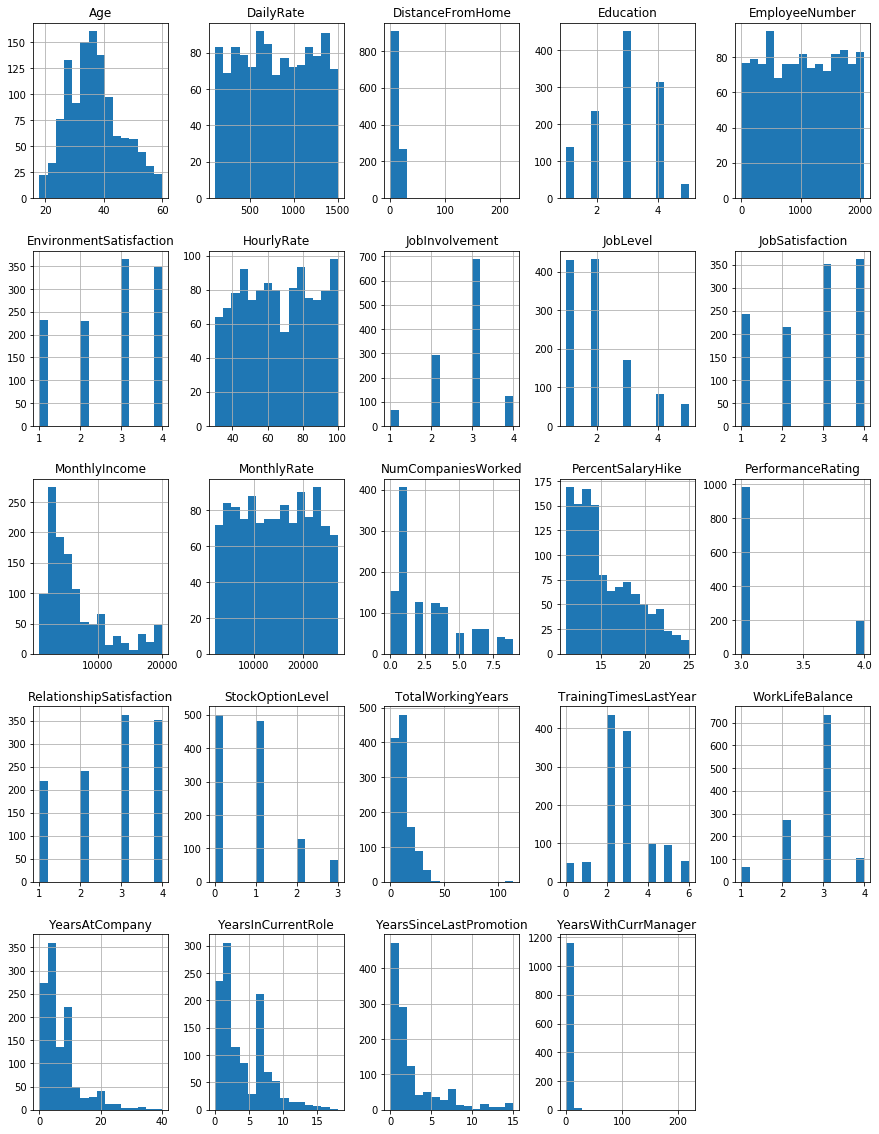

In [16]:
# By ploting histogram of each numerical variable, it's easy to see their distributions
employee[num0].hist(bins=15, figsize=(15, 20));

From the bar chart of the distribution of each numerical category above, it seems like some columns have outliers, such as 'TotalWorkingYears', 'YearsWithCurrManager', etc. To detect the outliers, use boxplot to see.

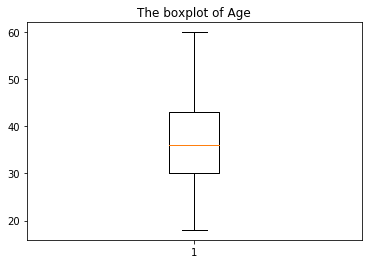

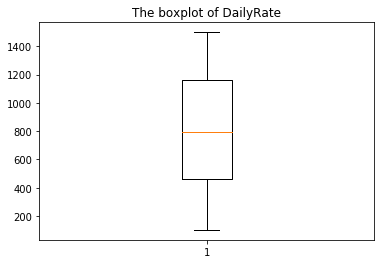

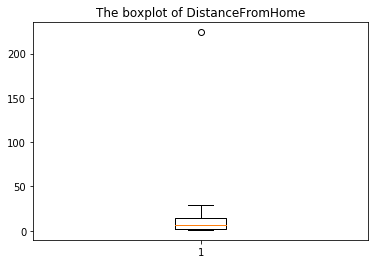

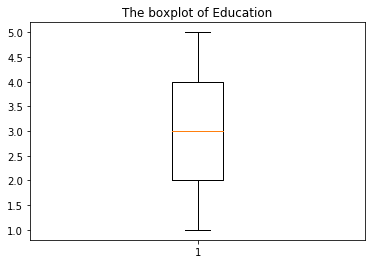

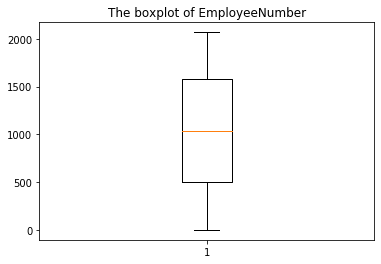

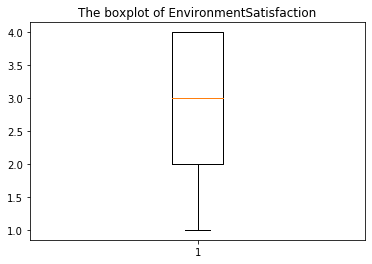

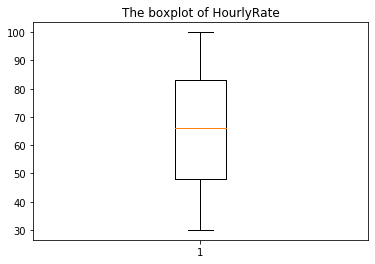

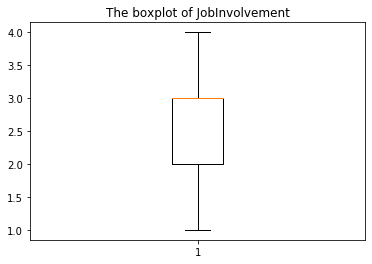

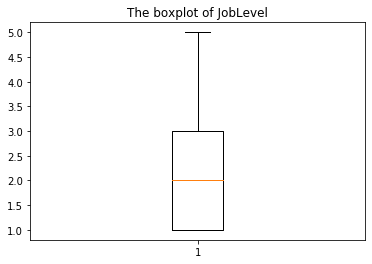

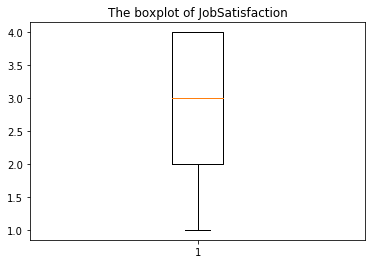

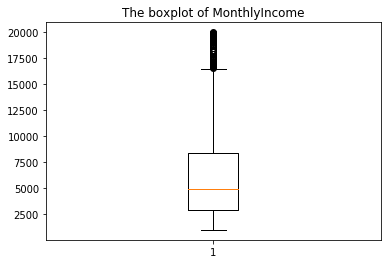

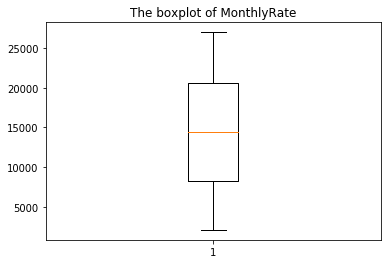

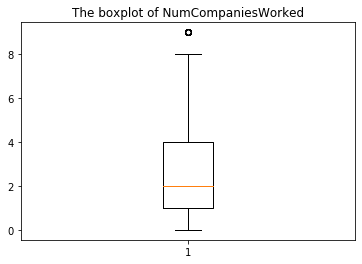

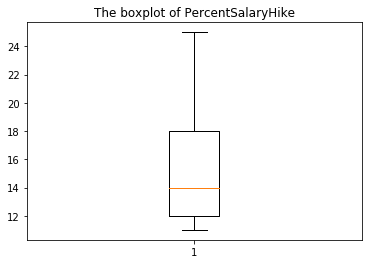

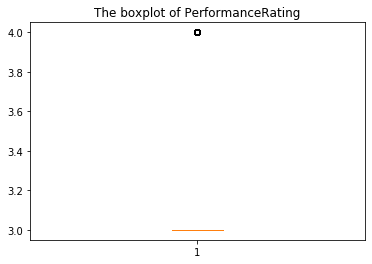

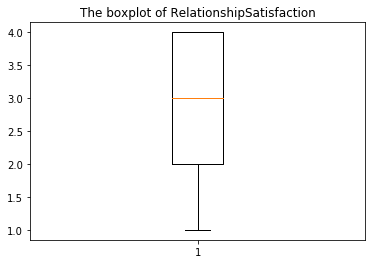

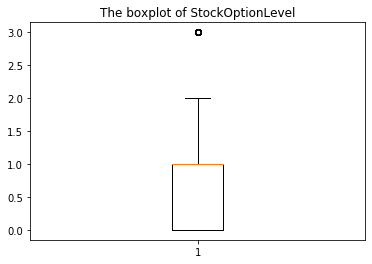

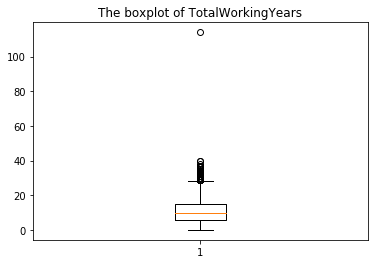

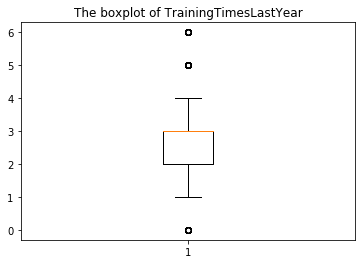

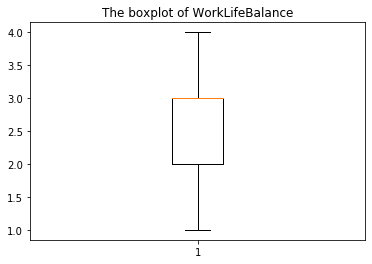

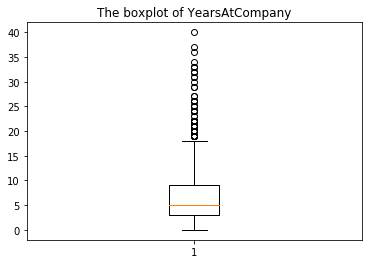

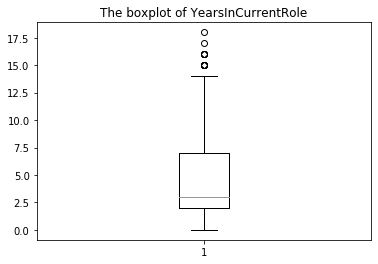

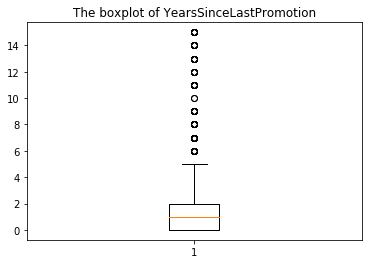

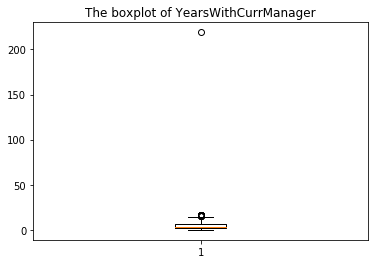

In [17]:
for i in num0:
    plt.boxplot(x=employee[i])
    plt.title('The boxplot of '+str(i))
    plt.show()

To replace these outliers, use the median value of each column.

In [18]:
import numpy as np
employee[num0] = np.where(employee[num0]>employee[num0].quantile(0.95),employee[num0].quantile(0.50), employee[num0])
employee[num0] = np.where(employee[num0]<employee[num0].quantile(0.05),employee[num0].quantile(0.50), employee[num0])
employee[num0].shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

(1176, 24)

In [19]:
employee.describe().T

count          mean          std     min     25%  \
Age                       1176.0     36.724490     7.177313    24.0    31.0   
Attrition                 1176.0      0.157313     0.364250     0.0     0.0   
DailyRate                 1176.0    800.001701   345.195303   161.0   530.0   
DistanceFromHome          1176.0      8.351190     6.994098     1.0     2.0   
Education                 1176.0      2.832483     0.953381     1.0     2.0   
EmployeeNumber            1176.0   1036.189838   513.608936   105.0   601.5   
EnvironmentSatisfaction   1176.0      2.704932     1.094128     1.0     2.0   
HourlyRate                1176.0     65.756803    17.403459    34.0    51.0   
JobInvolvement            1176.0      2.740646     0.719277     1.0     2.0   
JobLevel                  1176.0      1.923469     0.890189     1.0     1.0   
JobSatisfaction           1176.0      2.710034     1.113217     1.0     2.0   
MonthlyIncome             1176.0   5980.938138  3613.801785  2119.0  3407.0   
MonthlyRate               1176.0  14460.304422  6061.483628  3465.0  9347.0   
NumCompaniesWorked        1176.0      2.488946     2.202872     0.0     1.0   
PercentSalaryHike         1176.0     14.825680     3.165676    11.0    12.0   
PerformanceRating         1176.0      3.162415     0.368988     3.0     3.0   
RelationshipSatisfaction  1176.0      2.718537     1.083664     1.0     2.0   
StockOptionLevel          1176.0      0.795918     0.847033     0.0     0.0   
TotalWorkingYears         1176.0     10.371599     6.197639     1.0     6.0   
TrainingTimesLastYear     1176.0      2.791667     0.956037     1.0     2.0   
WorkLifeBalance           1176.0      2.747449     0.691586     1.0     2.0   
YearsAtCompany            1176.0      6.138605     4.276846     1.0     3.0   
YearsInCurrentRole        1176.0      3.693027     2.877674     0.0     2.0   
YearsSinceLastPromotion   1176.0      1.596088     2.174346     0.0     0.0   
YearsWithCurrManager      1176.0      3.685374     3.038699     0.0     2.0   

                                50%       75%      max  
Age                          36.000     41.00     54.0  
Attrition                     0.000      0.00      1.0  
DailyRate                   796.000   1097.00   1427.0  
DistanceFromHome              7.000     11.00     26.0  
Education                     3.000      4.00      4.0  
EmployeeNumber             1032.375   1459.25   1968.0  
EnvironmentSatisfaction       3.000      4.00      4.0  
HourlyRate                   66.000     80.00     97.0  
JobInvolvement                3.000      3.00      4.0  
JobLevel                      2.000      2.00      4.0  
JobSatisfaction               3.000      4.00      4.0  
MonthlyIncome              4948.125   6885.50  17861.0  
MonthlyRate               14483.500  19555.75  25470.0  
NumCompaniesWorked            2.000      4.00      8.0  
PercentSalaryHike            14.000     17.00     22.0  
PerformanceRating             3.000      3.00      4.0  
RelationshipSatisfaction      3.000      4.00      4.0  
StockOptionLevel              1.000      1.00      3.0  
TotalWorkingYears            10.000     13.00     28.0  
TrainingTimesLastYear         3.000      3.00      5.0  
WorkLifeBalance               3.000      3.00      4.0  
YearsAtCompany                5.000      8.00     20.0  
YearsInCurrentRole            3.000      7.00     10.0  
YearsSinceLastPromotion       1.000      2.00      9.0  
YearsWithCurrManager          3.000      7.00     11.0

To find the correlation between 'Attrtion' and other numerical variables, use heatmap and correlation bar chart. 

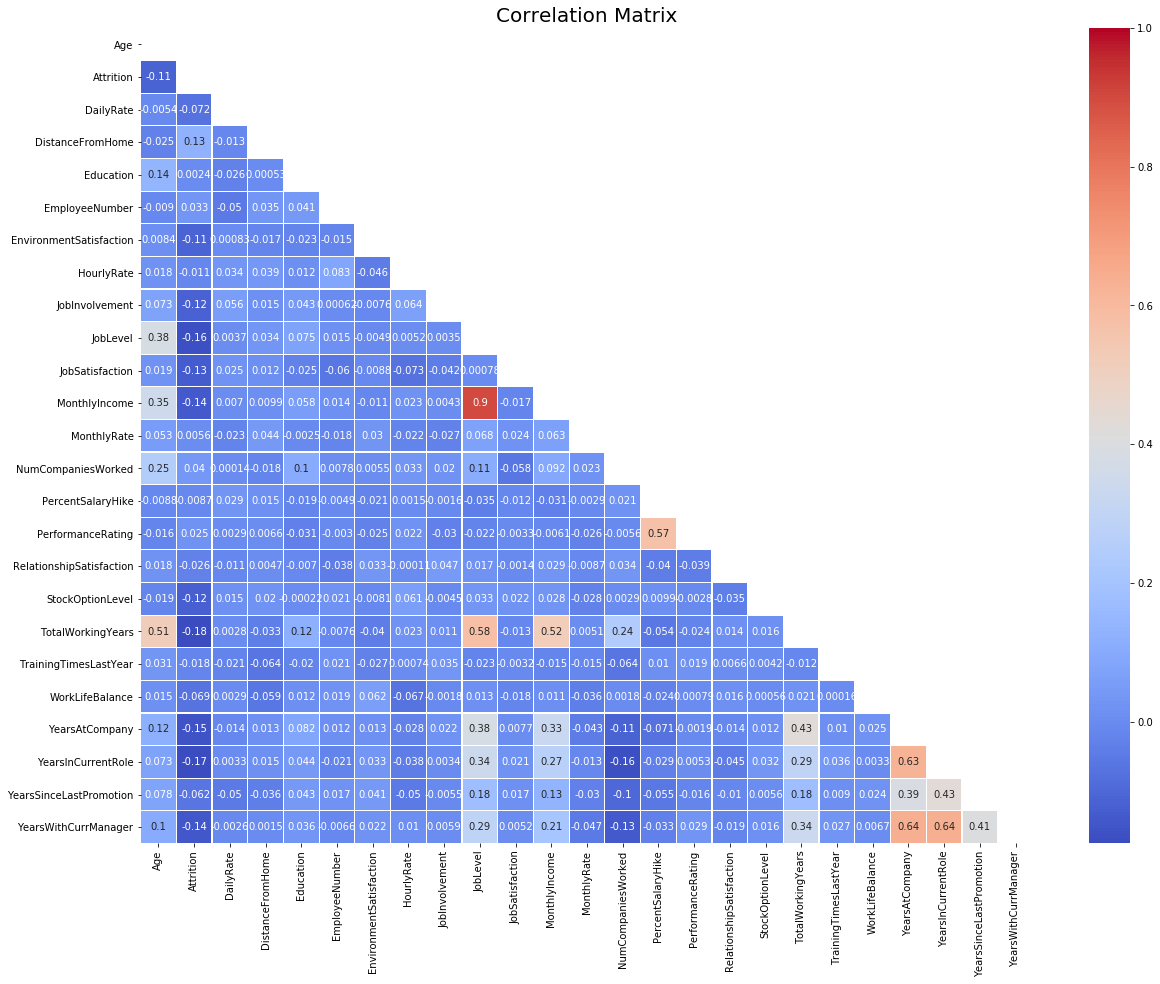

In [20]:
plt.figure(figsize = (20,15))
Matrix = np.triu(employee[numerical].corr())
ax = sns.heatmap(employee[numerical].corr(),  annot = True, fmt='.2g', mask=Matrix, cmap= 'coolwarm', 
                 linewidths=.2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix',y=-0.1, fontsize=20);

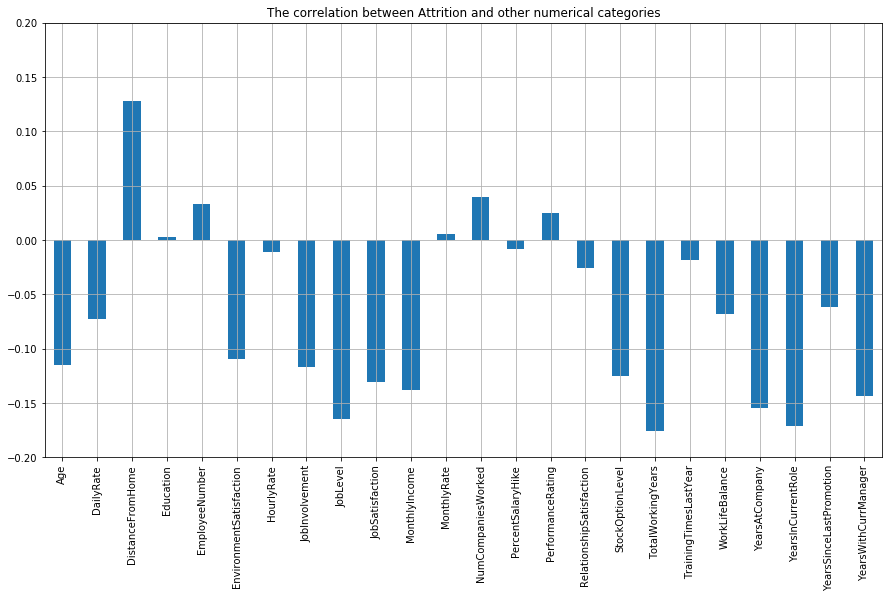

In [21]:
employee[num0].corrwith(employee['Attrition']).plot.bar(figsize=(15,8), grid=True, ylim=[-0.2,0.2],
                                                         title='The correlation between Attrition and other numerical categories')


Form both the heatmap and correlation bar chart, we can see:
* 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany' and 'YearsCurrentRole' have a very high correlation with Attrition, and the correlation of them are all negative, which means have a negative effect on attrition.


* 'DistanceFromHome'(positive), 'MonthlyIncome'(negative), 'YearsWithCurrManager'(negative) and some other categories have a relative high correlation with attrition.


* 'Education', 'HourlyRate', 'MonthlyRate' and 'PercentSalaryHike' have a pretty low correlation with attrition.

- <b>For categorical data:

To explore the categorical data, we choose when 'Attrition'=0 (employees stay at the company), then plot the pie chart to see the distribution.

In [22]:
att0_df = employee[employee['Attrition']==0]

In [23]:
for i in employee[categorical].columns:
    figure = px.pie(att0_df, i, title='Attrition by'+str(i)) 
    figure.show()

* <b>byBusinessTravel: </b> 72.7% employees stayed rarely travel.


* <b>byDepartment: </b> 67.3% employees stayed are from research & development department, and neary a quarter of employees stayed are from sales.


* <b>byEducationField: </b> Most employees stayed studied life sciences and medical, which means this company type maybe related to medical and health.


* <b>byJobRole: </b> Employees stayed has a quite equal distribution as a role of sales executive, research scientist and laboratory technician, which total occupied more than half percent.


* <b>byMaritalStatus: </b> Most employees stayed are married, which the proportion is 48.3%.


* <b>byOverTime: </b> 75% employees stayed don't work overtime.

## Run association rule mining algorithm using default settings as a baseline model.

### Data Pre-processing: Discretization
    
   Numerical variables are continuous, we need to change them to discrete variables by assigning them into different groups. Except those only have few unique values (coloumns showed below), seperate eahc of other numerical columns into 3 or 4 levels. Then store the below columns to new colums and covert to object type.
   1. 'Education'(5 level)
   2. 'EnvironmentSatisfaction'(4 level)
   3. 'JobInvolvement'(4 levels)
   4. 'JobLevel'(5 levels)
   5. 'JobSatisfaction'(4 levels)
   6. 'PerformanceRating'(2 levels)
   7. 'RelationshipSatisfaction(4 levels)
   8. 'StockOptionLevel'(4 levels)
   9. 'WorkLifeBalance'(4 levels)

In [24]:
employee['Age_dis'] = pd.qcut(employee.Age, 3, labels = ['low_age','med_age','high_age'])
employee['DailyRate_dis'] = pd.qcut(employee.DailyRate, 3, labels = ['low_daily_rate', 'med_daily_rate', 'high_daily_rate'])
employee['DistanceFromHome_dis'] = pd.qcut(employee.DistanceFromHome, 3, labels = ['low_age','med_age','high_age'])
employee['EmployeeNumber_dis'] = pd.qcut(employee.EmployeeNumber, 4, labels = ['few_employees','some_employees','many_employees','lots_of_employees'])
employee['HourlyRate_dis'] = pd.qcut(employee.HourlyRate, 3, labels = ['low_hourly_rate','med_hourly_rate','high_hourly_rate'])
employee['MonthlyIncome_dis'] = pd.qcut(employee.MonthlyIncome, 3, labels = ['low_monthly_income','med_monthly_income','high_monthly_income'])
employee['MonthlyRate_dis'] = pd.qcut(employee.MonthlyRate, 3, labels = ['low_monthly_rate','med_monthly_rate','high_monthly_rate'])
employee['NumCompaniesWorked_dis'] = pd.qcut(employee.NumCompaniesWorked, 3, labels = ['few_com','med_com','many_com'])
employee['PercentSalaryHike_dis'] = pd.qcut(employee.PercentSalaryHike, 4, labels = ['level1_salary_hike','level2_salary_hike', 'level3_salary_hike','level4_salary_hike'])
employee['TotalWorkingYears_dis'] = pd.qcut(employee.TotalWorkingYears, 3, labels = ['few_experience','mild_experience','high_experience'])
employee['TrainingTimesLastYear_dis'] = pd.qcut(employee.TrainingTimesLastYear, 3, labels = ['short_training_time','mod_training_time','long_training_time'])
employee['YearsAtCompany_dis'] = pd.qcut(employee.YearsAtCompany, 3, labels = ['fresh_worker','mod_worker','experienced_worker'])
employee['YearsInCurrentRole_dis'] = pd.qcut(employee.YearsInCurrentRole, 3, labels = ['new_to_role','mod_in_role','long_in_role'])
employee['YearsSinceLastPromotion_dis'] = pd.cut(employee.YearsSinceLastPromotion, 3, labels = ['recent_promote','mod_promote','long_time_promote'])
employee['YearsWithCurrManager_dis'] = pd.qcut(employee.YearsWithCurrManager, 3, labels = ['short_time_with_manager','mod_time_with_manager','long_time_with_manager'])



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
employee['Education_dis'] = employee.Education.astype('object')
employee['EnvironmentSatisfaction_dis'] = employee.EnvironmentSatisfaction.astype('object')
employee['JobInvolvement_dis'] = employee.JobInvolvement.astype('object')
employee['JobLevel_dis'] = employee.JobLevel.astype('object')
employee['JobSatisfaction_dis'] = employee.JobSatisfaction.astype('object')
employee['PerformanceRating_dis'] = employee.PerformanceRating.astype('object')
employee['RelationshipSatisfaction_dis'] = employee.RelationshipSatisfaction.astype('object')
employee['StockOptionLevel_dis'] = employee.StockOptionLevel.astype('object')
employee['WorkLifeBalance_dis'] = employee.WorkLifeBalance.astype('object')


In [26]:
employee = employee.astype('str')

employee[employee.columns] = employee.apply(lambda x: x.str.strip())
employee2 = employee.astype('object')
employee2 = employee.drop(['Age', 'DailyRate', 'DistanceFromHome','Education', 'EmployeeNumber',
                           'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                           'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
                           'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                           'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)

employee3 = pd.DataFrame({col: str(col)+'=' for col in employee2}, 
                index=employee2.index) + employee2.astype(str)
employee3.head()

Attrition                BusinessTravel  \
0  Attrition=0  BusinessTravel=Travel_Rarely   
1  Attrition=0  BusinessTravel=Travel_Rarely   
2  Attrition=0  BusinessTravel=Travel_Rarely   
3  Attrition=0     BusinessTravel=Non-Travel   
4  Attrition=0  BusinessTravel=Travel_Rarely   

                          Department                EducationField  \
0                   Department=Sales  EducationField=Life Sciences   
1  Department=Research & Development  EducationField=Life Sciences   
2                   Department=Sales        EducationField=Medical   
3  Department=Research & Development        EducationField=Medical   
4  Department=Research & Development  EducationField=Life Sciences   

          Gender                            JobRole           MaritalStatus  \
0    Gender=Male            JobRole=Sales Executive   MaritalStatus=Married   
1  Gender=Female      JobRole=Laboratory Technician   MaritalStatus=Married   
2  Gender=Female            JobRole=Sales Executive    MaritalStatus=Single   
3    Gender=Male  JobRole=Healthcare Representative  MaritalStatus=Divorced   
4  Gender=Female  JobRole=Healthcare Representative    MaritalStatus=Single   

       OverTime           Age_dis                  DailyRate_dis  ...  \
0   OverTime=No   Age_dis=low_age  DailyRate_dis=high_daily_rate  ...   
1   OverTime=No  Age_dis=high_age  DailyRate_dis=high_daily_rate  ...   
2   OverTime=No  Age_dis=high_age   DailyRate_dis=low_daily_rate  ...   
3  OverTime=Yes   Age_dis=med_age   DailyRate_dis=low_daily_rate  ...   
4   OverTime=No   Age_dis=med_age  DailyRate_dis=high_daily_rate  ...   

                           YearsWithCurrManager_dis      Education_dis  \
0  YearsWithCurrManager_dis=short_time_with_manager  Education_dis=1.0   
1    YearsWithCurrManager_dis=mod_time_with_manager  Education_dis=4.0   
2    YearsWithCurrManager_dis=mod_time_with_manager  Education_dis=2.0   
3  YearsWithCurrManager_dis=short_time_with_manager  Education_dis=1.0   
4    YearsWithCurrManager_dis=mod_time_with_manager  Education_dis=3.0   

       EnvironmentSatisfaction_dis      JobInvolvement_dis      JobLevel_dis  \
0  EnvironmentSatisfaction_dis=4.0  JobInvolvement_dis=3.0  JobLevel_dis=2.0   
1  EnvironmentSatisfaction_dis=4.0  JobInvolvement_dis=3.0  JobLevel_dis=2.0   
2  EnvironmentSatisfaction_dis=3.0  JobInvolvement_dis=2.0  JobLevel_dis=2.0   
3  EnvironmentSatisfaction_dis=4.0  JobInvolvement_dis=2.0  JobLevel_dis=4.0   
4  EnvironmentSatisfaction_dis=4.0  JobInvolvement_dis=2.0  JobLevel_dis=3.0   

       JobSatisfaction_dis      PerformanceRating_dis  \
0  JobSatisfaction_dis=3.0  PerformanceRating_dis=3.0   
1  JobSatisfaction_dis=3.0  PerformanceRating_dis=4.0   
2  JobSatisfaction_dis=3.0  PerformanceRating_dis=3.0   
3  JobSatisfaction_dis=2.0  PerformanceRating_dis=3.0   
4  JobSatisfaction_dis=2.0  PerformanceRating_dis=3.0   

       RelationshipSatisfaction_dis      StockOptionLevel_dis  \
0  RelationshipSatisfaction_dis=3.0  StockOptionLevel_dis=2.0   
1  RelationshipSatisfaction_dis=2.0  StockOptionLevel_dis=1.0   
2  RelationshipSatisfaction_dis=1.0  StockOptionLevel_dis=0.0   
3  RelationshipSatisfaction_dis=4.0  StockOptionLevel_dis=1.0   
4  RelationshipSatisfaction_dis=4.0  StockOptionLevel_dis=0.0   

       WorkLifeBalance_dis  
0  WorkLifeBalance_dis=2.0  
1  WorkLifeBalance_dis=3.0  
2  WorkLifeBalance_dis=3.0  
3  WorkLifeBalance_dis=3.0  
4  WorkLifeBalance_dis=1.0  

[5 rows x 32 columns]

### Visualize Frequent Itemsets

Melting the dataframe: transfer the dataframe into a new dataframe only contains two columns: variable(=column name), value(the value in that column). This will be easy for us to count the frequency of different categories. 

In [27]:
melted_data = pd.melt(employee3)
frequency = melted_data.groupby(by=['value'])['value'].count().sort_values(ascending=False)
frequency.head()

value
Attrition=0                                   991
PerformanceRating_dis=3.0                     985
YearsSinceLastPromotion_dis=recent_promote    980
OverTime=No                                   839
BusinessTravel=Travel_Rarely                  839
Name: value, dtype: int64

- 991 employees stayed at the company.


- Employees who recently promoted may become a very supportive variable.


- Number of employees who rarely travel and who don't work overtime is the same, there may contains some relationships.


In [28]:
freq_itemset = pd.DataFrame({'item':frequency.index, 'frequency':frequency.values})
freq_itemset

item  frequency
0                                   Attrition=0        991
1                     PerformanceRating_dis=3.0        985
2    YearsSinceLastPromotion_dis=recent_promote        980
3                                   OverTime=No        839
4                  BusinessTravel=Travel_Rarely        839
..                                          ...        ...
106                     WorkLifeBalance_dis=1.0         65
107                   JobRole=Research Director         65
108                  Department=Human Resources         54
109                     JobRole=Human Resources         43
110              EducationField=Human Resources         25

[111 rows x 2 columns]

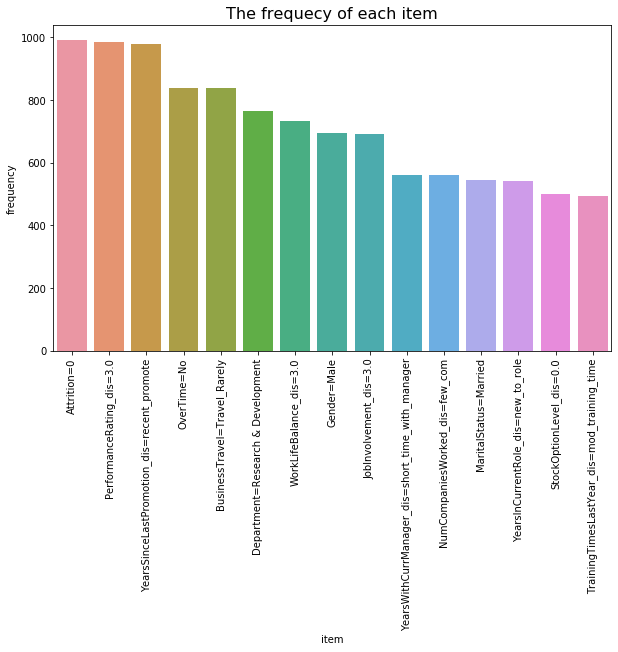

In [29]:
plt.figure(figsize = (10,6))
g = sns.barplot(data=freq_itemset.head(15), x='item', y='frequency')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('The frequecy of each item', fontsize=16)
plt.show()

### Run APriori with Apyori Library

<b>Support:</b>

The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :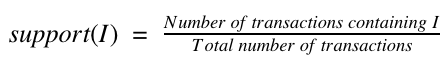


<b>Confidence:</b>

This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2,  in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.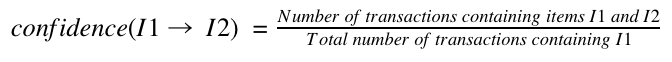

<b>Lift:</b>

Lift is the ratio between the confidence and support expressed as :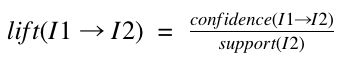

<b>min_support : </b>

Floating point value between 0 and 1 that indicates the minimum support required for an itemset to be selected.

In [30]:
records = []
for i in range(0,len(employee3)):
    records.append([str(employee3.values[i,j]) 
    for j in range(0, len(employee3.columns))])
frequent_itemset = ap.apriori(records, 
                              min_support=0.8, 
                              min_confidence=0.8,
                              min_lift=1,
                              min_length=2)
results = list(frequent_itemset)
len(results)
results[0:5]

[RelationRecord(items=frozenset({'Attrition=0'}), support=0.842687074829932, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Attrition=0'}), confidence=0.842687074829932, lift=1.0)]),
 RelationRecord(items=frozenset({'PerformanceRating_dis=3.0'}), support=0.8375850340136054, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'PerformanceRating_dis=3.0'}), confidence=0.8375850340136054, lift=1.0)]),
 RelationRecord(items=frozenset({'YearsSinceLastPromotion_dis=recent_promote'}), support=0.8333333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'YearsSinceLastPromotion_dis=recent_promote'}), confidence=0.8333333333333334, lift=1.0)])]

### Use Association Rules from Mlxtend Library
- fit( ) method allows te to learn the unique groupings associated with our dataset.
- te.columns_ argument allows us to show the unique column names that correspond to the transaction's encoder array. 

In [31]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets.sort_values(by='support',ascending=False)

support                                           itemsets
0   0.842687                                      (Attrition=0)
6   0.837585                        (PerformanceRating_dis=3.0)
8   0.833333       (YearsSinceLastPromotion_dis=recent_promote)
5   0.713435                                      (OverTime=No)
1   0.713435                     (BusinessTravel=Travel_Rarely)
13  0.709184           (Attrition=0, PerformanceRating_dis=3.0)
25  0.697279  (PerformanceRating_dis=3.0, YearsSinceLastProm...
15  0.693878  (Attrition=0, YearsSinceLastPromotion_dis=rece...
2   0.649660                (Department=Research & Development)
12  0.636054                         (Attrition=0, OverTime=No)
7   0.624150                          (WorkLifeBalance_dis=3.0)
9   0.612245        (Attrition=0, BusinessTravel=Travel_Rarely)
17  0.602891  (PerformanceRating_dis=3.0, BusinessTravel=Tra...
22  0.596939           (PerformanceRating_dis=3.0, OverTime=No)
18  0.592687  (BusinessTravel=Travel_Rarely, YearsSinceLastP...
23  0.591837  (OverTime=No, YearsSinceLastPromotion_dis=rece...
3   0.589286                                      (Gender=Male)
4   0.586735                           (JobInvolvement_dis=3.0)
31  0.585034  (Attrition=0, PerformanceRating_dis=3.0, Years...
10  0.567177   (Attrition=0, Department=Research & Development)
20  0.550170  (YearsSinceLastPromotion_dis=recent_promote, D...
19  0.539116  (PerformanceRating_dis=3.0, Department=Researc...
14  0.537415             (Attrition=0, WorkLifeBalance_dis=3.0)
29  0.531463  (Attrition=0, OverTime=No, PerformanceRating_d...
30  0.522109  (Attrition=0, OverTime=No, YearsSinceLastPromo...
24  0.518707  (PerformanceRating_dis=3.0, WorkLifeBalance_di...
27  0.518707  (Attrition=0, BusinessTravel=Travel_Rarely, Pe...
26  0.517857  (WorkLifeBalance_dis=3.0, YearsSinceLastPromot...
16  0.509354        (OverTime=No, BusinessTravel=Travel_Rarely)
28  0.505102  (Attrition=0, BusinessTravel=Travel_Rarely, Ye...
11  0.503401              (JobInvolvement_dis=3.0, Attrition=0)
32  0.500850  (PerformanceRating_dis=3.0, BusinessTravel=Tra...
21  0.500000  (Gender=Male, YearsSinceLastPromotion_dis=rece...

### Interpretation of some items
- (PerformanceRating=3, Attrition=0), support=0.709184
- (Department=Research & Development, Attrition=0), support=0.567177

In [32]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules[(rules['lift']>1) & (rules['confidence'] > 0.8)].head(10)

antecedents  \
1        (BusinessTravel=Travel_Rarely)   
3   (Department=Research & Development)   
4              (JobInvolvement_dis=3.0)   
7                         (OverTime=No)   
8                         (Attrition=0)   
9           (PerformanceRating_dis=3.0)   
11            (WorkLifeBalance_dis=3.0)   
15       (BusinessTravel=Travel_Rarely)   
17  (Department=Research & Development)   
18                        (Gender=Male)   

                                     consequents  antecedent support  \
1                                  (Attrition=0)            0.713435   
3                                  (Attrition=0)            0.649660   
4                                  (Attrition=0)            0.586735   
7                                  (Attrition=0)            0.713435   
8                    (PerformanceRating_dis=3.0)            0.842687   
9                                  (Attrition=0)            0.837585   
11                                 (Attrition=0)            0.624150   
15                   (PerformanceRating_dis=3.0)            0.713435   
17  (YearsSinceLastPromotion_dis=recent_promote)            0.649660   
18  (YearsSinceLastPromotion_dis=recent_promote)            0.589286   

    consequent support   support  confidence      lift  leverage  conviction  
1             0.842687  0.612245    0.858164  1.018367  0.011042    1.109122  
3             0.842687  0.567177    0.873037  1.036015  0.019717    1.239042  
4             0.842687  0.503401    0.857971  1.018137  0.008968    1.107611  
7             0.842687  0.636054    0.891538  1.057970  0.034852    1.450391  
8             0.837585  0.709184    0.841574  1.004763  0.003362    1.025180  
9             0.842687  0.709184    0.846701  1.004763  0.003362    1.026180  
11            0.842687  0.537415    0.861035  1.021774  0.011452    1.132036  
15            0.837585  0.602891    0.845054  1.008917  0.005328    1.048201  
17            0.833333  0.550170    0.846859  1.016230  0.008787    1.088319  
18            0.833333  0.500000    0.848485  1.018182  0.008929    1.100000

### Interpretation of some baseline unsupervised association rules
index:1 ((BusinessTravel=Rarely)->(Attrition=0))
- Lift == 1.018367 
The meaning of this is that when an employee travels rarely, the probability that they don't end up leaving the company is increased by 1.84%. Since lift is symmetrical (order doesn't matter) the reverse is also true.
- Confidence = 0.858164 
The meaning of this is that there is an 86% chance an employee does not show attrition given that they do not travel very much.
- Support = 0.612245
The meaning of this is that 61% of the time these itemsets are associated with one another.

indesx:15 ((BusinessTravel=Travel_Rarely)->(PerformanceRating_dis=3.0))	
- Lift == 	1.008917
This means when an employee rarely travel, the probability that their performance rate is 3 is increased by 0.89%.
- Confidence == 0.845054
This means there is an 85% of chance an employee has a performance rate 3 given that they rarely travel.
- Support == 0.602891
This means 60% of tiem these items are associated together.

### Plot Association Rules

In [33]:
fig = px.scatter(rules, x='support', y='confidence', color='lift')
fig.update_layout(title='Scatterplot of Association Rules', title_x=0.5)
fig.show()

### Interpretation
- We would like to see values with the highest lift and confidence values in order to determine a rules reliability and uniqueness.
- But we also need to avoid overfitting and underfitting.


<b>Overfitting in Machine Learning</b>
- Overfitting refers to a model that models the training data too well.
- Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function.


<b>Underfitting in Machine Learning</b>
- Underfitting refers to a model that can neither model the training data nor generalize to new data.
- Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting.



## A Supervised Apriori Model:

In [34]:
def SupervisedApriori(data,consequent,min_supp,min_conf,min_lift):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    #filter according to lift
    rules = rules[rules['lift'] > min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    return(sup_rules)

In [35]:
SupervisedApriori(data=df,consequent = [('Attrition=0')],
min_supp=0.5, min_conf=0.8, min_lift=1).sort_values(by='support',ascending=False)

antecedents    consequents  \
4                        (PerformanceRating_dis=3.0)  (Attrition=0)   
3                                      (OverTime=No)  (Attrition=0)   
0                     (BusinessTravel=Travel_Rarely)  (Attrition=0)   
1                (Department=Research & Development)  (Attrition=0)   
5                          (WorkLifeBalance_dis=3.0)  (Attrition=0)   
8           (PerformanceRating_dis=3.0, OverTime=No)  (Attrition=0)   
9  (OverTime=No, YearsSinceLastPromotion_dis=rece...  (Attrition=0)   
6  (PerformanceRating_dis=3.0, BusinessTravel=Tra...  (Attrition=0)   
7  (BusinessTravel=Travel_Rarely, YearsSinceLastP...  (Attrition=0)   
2                           (JobInvolvement_dis=3.0)  (Attrition=0)   

   antecedent support  consequent support   support  confidence      lift  \
4            0.837585            0.842687  0.709184    0.846701  1.004763   
3            0.713435            0.842687  0.636054    0.891538  1.057970   
0            0.713435            0.842687  0.612245    0.858164  1.018367   
1            0.649660            0.842687  0.567177    0.873037  1.036015   
5            0.624150            0.842687  0.537415    0.861035  1.021774   
8            0.596939            0.842687  0.531463    0.890313  1.056517   
9            0.591837            0.842687  0.522109    0.882184  1.046870   
6            0.602891            0.842687  0.518707    0.860367  1.020980   
7            0.592687            0.842687  0.505102    0.852224  1.011317   
2            0.586735            0.842687  0.503401    0.857971  1.018137   

   leverage  conviction  
4  0.003362    1.026180  
3  0.034852    1.450391  
0  0.011042    1.109122  
1  0.019717    1.239042  
5  0.011452    1.132036  
8  0.028430    1.434204  
9  0.023376    1.335241  
6  0.010659    1.126615  
7  0.005652    1.064535  
2  0.008968    1.107611

## Experimenting with different algorithm hyper-parameters and tunning the model

### <b>Top 5 rules for those who stay at the company</b>

In [36]:
rule1 = SupervisedApriori(data=df,consequent = [('Attrition=0')],
                          min_supp=0.53, min_conf=0.85, min_lift=1).sort_values(by='support',ascending=False)
rule1

antecedents    consequents  \
2                             (OverTime=No)  (Attrition=0)   
0            (BusinessTravel=Travel_Rarely)  (Attrition=0)   
1       (Department=Research & Development)  (Attrition=0)   
3                 (WorkLifeBalance_dis=3.0)  (Attrition=0)   
4  (PerformanceRating_dis=3.0, OverTime=No)  (Attrition=0)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.713435            0.842687  0.636054    0.891538  1.057970   
0            0.713435            0.842687  0.612245    0.858164  1.018367   
1            0.649660            0.842687  0.567177    0.873037  1.036015   
3            0.624150            0.842687  0.537415    0.861035  1.021774   
4            0.596939            0.842687  0.531463    0.890313  1.056517   

   leverage  conviction  
2  0.034852    1.450391  
0  0.011042    1.109122  
1  0.019717    1.239042  
3  0.011452    1.132036  
4  0.028430    1.434204

In [37]:
fig = px.scatter(rule1, x='support', y='confidence', size='lift', color='antecedents', 
                 text='lift')
fig.update_traces(texttemplate='%{text:.4s}', textposition='top center')
fig.update_layout(title='Scatterplot of Rule 1', title_x=0.5)
fig.show()

### Interpretations:


- Employees who don't work overtime is the most important rule in predicting which employee will stay at company (attrition=0). 89% of employees that don't work overtime will not leave the company.
- Employees who rarely travel is another top rule to predict non-attrition. It shows that there are 86% of these - - - Employees that didn't work overtime and had a performance rating of 3 were also amongst the most reliable rules for predicting non-attrition. I wanted to prevent overfitting in the model by keeping the support value high enough so that the rule could be generalizeable to most employees. Having a high confidence specification also allowed us to examine rules in the particular order that leads to correlation.

### Top 5 rules for those who leave the company

In [38]:
rule2 = SupervisedApriori(data=df,consequent = [('Attrition=1')],
                          min_supp=0.1, min_conf=0.16, min_lift=1.02).sort_values(by=['confidence','lift'],ascending=False)
pd.set_option('display.max_columns', None)
rule2

antecedents    consequents  \
0                         (StockOptionLevel_dis=0.0)  (Attrition=1)   
1               (YearsInCurrentRole_dis=new_to_role)  (Attrition=1)   
5  (YearsSinceLastPromotion_dis=recent_promote, Y...  (Attrition=1)   
3  (YearsWithCurrManager_dis=short_time_with_mana...  (Attrition=1)   
2       (YearsSinceLastPromotion_dis=recent_promote)  (Attrition=1)   
4  (PerformanceRating_dis=3.0, YearsSinceLastProm...  (Attrition=1)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.425170            0.157313  0.101190    0.238000  1.512908   
1            0.459184            0.157313  0.102891    0.224074  1.424384   
5            0.462585            0.157313  0.100340    0.216912  1.378855   
3            0.477891            0.157313  0.101190    0.211744  1.346004   
2            0.833333            0.157313  0.139456    0.167347  1.063784   
4            0.697279            0.157313  0.112245    0.160976  1.023283   

   leverage  conviction  
0  0.034306    1.105889  
1  0.030656    1.086041  
5  0.027570    1.076107  
3  0.026012    1.069052  
2  0.008362    1.012051  
4  0.002554    1.004365

In [39]:
fig = px.scatter(rule2, x='support', y='confidence', size='lift', color='antecedents', 
                 text='lift')
fig.update_traces(texttemplate='%{text:.4s}', textposition='top center')
fig.update_layout(title='Scatterplot of Rule 1', title_x=0.5)
fig.show()

### Interpretations:
- A StockOptionLevel rating of 0 was a common occurence that seemed to lead to attrition. The employees that fell into this group (~42%) were 51% more likely to show attrition than if these events were independent. This extremely high lift value is a practical derivation for one of our more interesting rules.
- Being short time with the current manager also played a large role in employee attrition. The lift value indicates that employees were 42% more likely to leave the company, demonstrating the value of longevity in the companies ability to maintain its employees.
- Recently promoted employees that were also recently assigned to a new manager also followed a similar trend even though they were only 34% more likely to leave the company. 